### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

Стандартизация

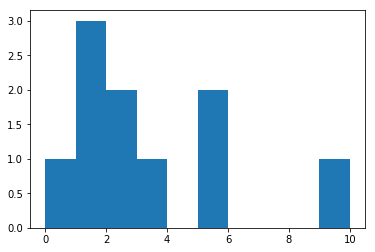

In [9]:
plt.hist(X[1])
plt.show()

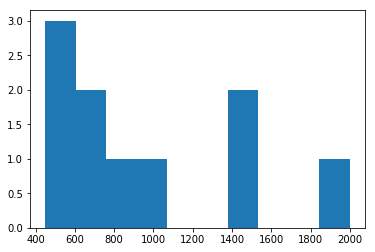

In [10]:
plt.hist(X[2])
plt.show()

In [11]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [12]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

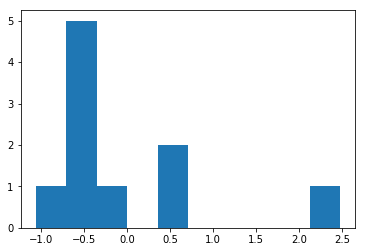

In [13]:
plt.hist(X_st[1])
plt.show()

In [14]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [15]:
X_st[2] = calc_std_fit(X[2])

In [16]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

SGD (Stochastic gradient descent)

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [18]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [19]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [48.97568774  4.12007769  3.44134779  4.72218825] 86.81626782542104
200 [55.50212905  4.9236659   2.63008004  4.83114648] 27.556778876536487
300 [56.3676628   5.39296192  2.01083347  5.01755597] 25.88920728642263
400 [56.4824495   5.67942686  1.53615006  5.2300996 ] 25.51448180825198
500 [56.49767246  5.85994985  1.16584992  5.43682455] 25.299737464012996
600 [56.49969132  5.97786321  0.87317936  5.62380755] 25.164147717163573
700 [56.49995906  6.05784533  0.639673    5.78642074] 25.0761544863187
800 [56.49999457  6.11413938  0.45212354  5.92460116] 25.018323453485927
900 [56.49999928  6.15511459  0.300783    6.04034443] 24.98008984589611
1000 [56.4999999   6.18580465  0.17826699  6.13640691] 24.954743096040183


array([56.4999999 ,  6.18580465,  0.17826699,  6.13640691])

In [20]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [21]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=4, alpha=1e-2)

500 [56.5078897   6.00206389  0.86759562  5.61986728] 12.878077317108545
1000 [56.51049613  6.21932961  0.0728679   6.22596136] 11.866663889840169
1500 [56.510575    6.28006617 -0.20751737  6.45500616] 11.49648159324635
2000 [56.510604    6.30102302 -0.30810073  6.53796596] 11.363600151928376
2500 [56.51061447  6.30851629 -0.34426995  6.56783862] 11.31592803069257
3000 [56.51061823  6.31120957 -0.35728066  6.57858643] 11.298800079772201
3500 [56.51061959  6.31217832 -0.36196107  6.58245291] 11.292641525327953
4000 [56.51062008  6.31252681 -0.36364479  6.58384383] 11.290426461887087
4500 [56.51062025  6.31265218 -0.36425048  6.58434419] 11.28962967200992
5000 [56.51062031  6.31269728 -0.36446838  6.5845242 ] 11.289343043215828


array([56.51062031,  6.31269728, -0.36446838,  6.5845242 ])

L1 регуляризация

L2 регуляризация

In [22]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [23]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

500 [56.49487895  5.89947315  1.04054601  5.5270874 ] 25.23755832331096
1000 [56.49717505  6.19501568  0.13564839  6.17098435] 24.947089650389493
1500 [56.49717514  6.26565597 -0.17868956  6.42516923] 24.910200887020064
2000 [56.49717514  6.28924463 -0.29120292  6.51776763] 24.905377672807827
2500 [56.49717514  6.29763759 -0.33165155  6.55113988] 24.904735047224676
3000 [56.49717514  6.30065228 -0.3462019   6.56314895] 24.904645262343745
3500 [56.49717514  6.3017366  -0.35143648  6.56746949] 24.904631263168568
4000 [56.49717514  6.30212668 -0.35331967  6.56902387] 24.904628595590758
4500 [56.49717514  6.30226702 -0.35399717  6.56958307] 24.904627942486606
5000 [56.49717514  6.30231751 -0.35424091  6.56978425] 24.904627747206018


array([56.49717514,  6.30231751, -0.35424091,  6.56978425])

In [24]:
eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [56.49767254  5.83477719  1.36781865  5.25424451] 25.413829625514786
1000 [56.4999999   6.17124081  0.25269258  6.07416416] 24.969784391475397
1500 [56.5         6.2575128  -0.13774522  6.39128671] 24.913059475565493
2000 [56.5         6.28678323 -0.27772011  6.50655795] 24.905712417850083
2500 [56.5         6.29722767 -0.32807425  6.54810646] 24.904760553791704
3000 [56.5         6.30098239 -0.34619733  6.56306445] 24.904637232271696
3500 [56.5         6.30233363 -0.3527205   6.5684486 ] 24.904621254991206
4000 [56.5         6.30281999 -0.35506846  6.57038658] 24.904619185007867
4500 [56.5         6.30299505 -0.35591359  6.57108415] 24.904618916825108
5000 [56.5         6.30305806 -0.35621778  6.57133523] 24.90461888207993


array([56.5       ,  6.30305806, -0.35621778,  6.57133523])

#### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [25]:
n = 21
coeffs = np.zeros((n, X_st.shape[0]))
lambda_list = np.logspace(-3, 1, n)
for i, val in enumerate(lambda_list):
    W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-4, lambda_=val)
    coeffs[i, :] = W

500 [5.82648382 0.69004235 1.39337798 2.29860074] 2652.6394770871943
1000 [10.64876944  1.34419334  1.9554282   2.89457402] 2164.8601481834853
1500 [15.01189206  1.86367288  2.37613509  3.35229244] 1770.4218242821632
2000 [18.95957176  2.27892917  2.68809748  3.70361793] 1450.4015267532934
2500 [22.53136571  2.61344468  2.91643939  3.9731044 ] 1190.1185231808204
3000 [25.76306458  2.88533212  3.08052314  4.17967266] 978.0360436371415
3500 [28.68705116  3.10856457  3.19526972  4.33790149] 804.9956561914845
4000 [31.33262487  3.29392384  3.2721767   4.45902282] 663.6698066437887
4500 [33.72629529  3.44973143  3.32010284  4.55168893] 548.160772016505
5000 [35.89204789  3.58241206  3.34587289  4.6225637 ] 453.7003503308968
500 [5.8263935  0.69003673 1.3933512  2.29854807] 2652.6497396591762
1000 [10.64845635  1.34416859  1.9553651   2.89445841] 2164.890915910438
1500 [15.0112498   1.86362195  2.37603283  3.35211018] 1770.4777336690033
2000 [18.95851621  2.27884911  2.68795741  3.70336939] 

500 [5.78802065 0.68764089 1.38198526 2.27620138] 2657.0122998981087
1000 [10.51597718  1.33365068  1.92868925  2.84564847] 2177.9335419669333
1500 [14.74056198  1.84202859  2.33295712  3.27550985] 1794.1321429292086
2000 [18.51536756  2.24497563  2.62915237  3.59937235] 1485.1693898776934
2500 [21.8882806   2.5670315   2.84342263  3.8427908 ] 1235.432008034041
3000 [24.90208943  2.82690264  2.99566157  4.02520622] 1032.843339257904
3500 [27.59502683  3.03885384  3.10100241  4.16140606] 867.9692225263656
4000 [30.00125504  3.21376768  3.17095483  4.26263575] 733.382099044226
4500 [32.15129916  3.35995105  3.21427048  4.33744491] 623.1983221135417
5000 [34.07243435  3.48374919  3.23760177  4.39233143] 532.7346669855283
500 [5.76559198 0.68623313 1.37535014 2.26316608] 2659.5643320840845
1000 [10.4390425   1.32750064  1.91321988  2.81740247] 2185.529302124537
1500 [14.58435396  1.82945073  2.3081227   3.23150688] 1807.8648209560931
2000 [18.26121052  2.22530771  2.59542497  3.5400452 ] 1

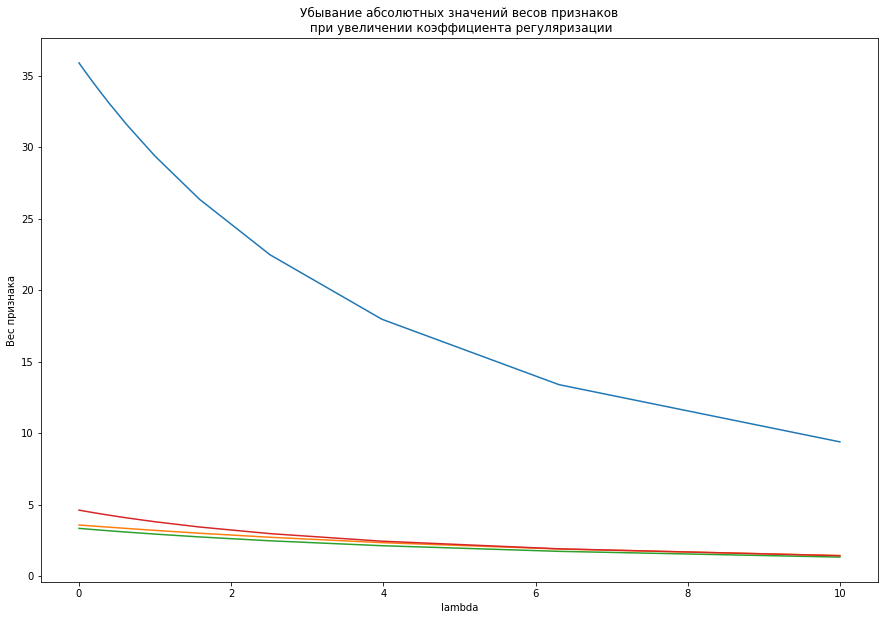

In [26]:
# Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации
plt.figure(figsize=(15, 10))
for i in range(X_st.shape[0]):
    plt.plot(lambda_list, coeffs[:, i])
plt.title('График зависимости весов всех признаков от lambda в L2-регуляризации')
plt.xlabel('lambda')
plt.ylabel('Вес признака');

#### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

На выходе получим результат только от конечной функции, то есть применение сразу нормализацию и стандартизацию не имеет смысла

#### 3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [28]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        if 0 in W:
            break
        else:
            W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W / abs(W)) 
        if i % (iterations / 10) == 0:
            print(W, err)
    return W

In [31]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-4, lambda_=1e-6)

[5.82663819 0.69005193 1.39342371 2.29869073] 2652.6219370376966
[10.64930466  1.34423559  1.95553601  2.89477161] 2164.8075526128023
[15.01299009  1.86375987  2.37630985  3.352604  ] 1770.3262432420136
[18.96137646  2.27906593  2.68833685  3.7040428 ] 1450.2612195869815
[22.53398846  2.61363197  2.91673679  3.97363776] 1189.9356414024817
[25.76658915  2.88556821  3.08086966  4.18030744] 977.815056728532
[28.69153795  3.10884654  3.19565546  4.33862964] 804.7422708245024
[31.33811461  3.2942483   3.27259158  4.45983612] 663.3902304928009
[33.73281224  3.45009503  3.32053709  4.55257946] 547.8612219527605
[35.8996026   3.58281175  3.34631736  4.62352414] 453.38673525959274


array([35.8996026 ,  3.58281175,  3.34631736,  4.62352414])